In [1]:
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_vector, plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler
import numpy as np
import matplotlib.pyplot as plt


### Implementación del estado asignado

#### 2.1. Implementación del estado cuántico |ψ⟩
En este bloque de código, se implementa un qubit en el estado cuántico asignado |ψ⟩, definido por los parámetros:
- **α = √(2/3)**
- **β = √(1/3) * exp(jπ/2)**
La ecuación que describe el estado cuántico implementado es:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$
$$ |\psi\rangle = \sqrt{\frac{2}{3}}|0\rangle + \sqrt{\frac{1}{3}}e^{i\frac{\pi}{2}}|1\rangle $$
Para lograrlo, se utiliza la plataforma Qiskit, inicializando un circuito cuántico con un único qubit y aplicando las puertas necesarias para preparar el estado |ψ⟩. Finalmente, se obtiene y visualiza el vector de estado resultante.

Estado cuántico inicial |ψ⟩:
Statevector([8.16496581e-01+0.j        , 3.53525080e-17+0.57735027j],
            dims=(2,))


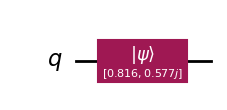

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Definir el estado cuántico |ψ⟩
alpha = np.sqrt(2/3)
beta = np.sqrt(1/3) * np.exp(1j * np.pi / 2)

# Inicializar el circuito con un qubit
qc = QuantumCircuit(1)

# Aplicar las puertas necesarias para crear el estado |ψ⟩
qc.initialize([alpha, beta], 0)

# Mostrar el circuito
qc.draw('mpl')

# Obtener el vector de estado
psi = Statevector.from_instruction(qc)
print("Estado cuántico inicial |ψ⟩:")
print(psi)



#### 2.2. Evaluación de la fidelidad
Posteriormente, se evalúa la fidelidad del qubit implementado |ψ⟩ con respecto al estado cuántico objetivo asignado. La fidelidad es una métrica que permite verificar qué tan similar es el estado implementado al estado objetivo, asegurando que la implementación sea correcta.

In [3]:
from qiskit.quantum_info import Statevector, state_fidelity

# Obtener el vector de estado de |Q₀⟩
psi_q0 = Statevector.from_instruction(qc)

# Estado objetivo |Q₀⟩
target = Statevector([alpha, beta])

# Calcular la fidelidad
fidelity = state_fidelity(psi_q0, target)
print(f'Fidelidad: {fidelity:.4f}')


Fidelidad: 1.0000


### Diseño e implementación de Circuito Cuántico

#### 3.1.1. Teletransportación cuántica del qubit |ψ⟩ de Alice a Bob utilizando el Estado W

En esta sección, se diseña un circuito cuántico que permite a "Alice" transmitir la información de su qubit |ψ⟩ a "Bob" mediante teletransportación cuántica. El estado cuántico compartido entre "Alice" y "Bob" es el **Estado W**, definido como:

$$ |W\rangle = \frac{1}{\sqrt{3}}(|001\rangle + |010\rangle + |100\rangle) $$

El circuito implementado incluye las siguientes etapas:
1. Preparación del Estado W compartido entre "Alice" y "Bob".
2. Inicialización del qubit de "Alice" en el estado |ψ⟩.
3. Ejecución del protocolo de teletransportación cuántica.

#### 3.1.2. Demostración matemática de la información cuántica recibida por "Bob"

La teletransportación cuántica asegura que el estado inicial del qubit de "Alice" (|ψ⟩) se transfiere a "Bob". Matemáticamente, esto se demuestra considerando las operaciones realizadas en el circuito:
1. El estado inicial del sistema es el producto tensorial del qubit de "Alice" y el Estado W:
    $$ |\psi\rangle \otimes |W\rangle = \left(\alpha|0\rangle + \beta|1\rangle\right) \otimes \frac{1}{\sqrt{3}}(|001\rangle + |010\rangle + |100\rangle) $$
2. Tras las operaciones de entrelazamiento y medición realizadas por "Alice", el estado colapsa en una de las posibles combinaciones, y "Bob" aplica operaciones condicionales para recuperar el estado original |ψ⟩.

#### 3.1.3. Utilidad del tercer qubit (m) del Estado W

El tercer qubit del Estado W, denominado **m**, no participa directamente en las operaciones de teletransportación entre "Alice" y "Bob". Sin embargo, su utilidad radica en:
- **Redundancia cuántica**: Proporciona un recurso adicional para operaciones futuras o corrección de errores.
- **Entrelazamiento residual**: Permite mantener una conexión cuántica entre los participantes, lo que podría ser útil en protocolos de comunicación cuántica más complejos.

#### 3.1.4. Gráfico del circuito cuántico

El siguiente gráfico muestra el circuito diseñado, destacando las dos etapas principales:
1. **Preparación del Estado W**: Incluye las puertas necesarias para crear el estado entrelazado compartido.
2. **Teletransportación cuántica**: Implementa el protocolo estándar para transferir el estado |ψ⟩ de "Alice" a "Bob".

```python
# Mostrar el circuito con las etapas delimitadas
qc.draw('mpl')
```

Measurement results:
{'001': 513, '011': 507, '000': 506, '010': 522}
Bob's state after teleportation (for '00' outcome):
Statevector([8.16496581e-01+0.j        , 3.53525080e-17+0.57735027j],
            dims=(2,))
Fidelity between Bob's final state and the original state: 1.000000


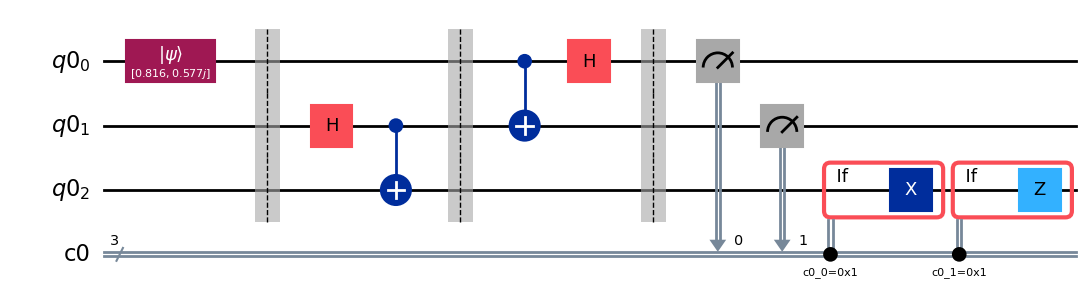

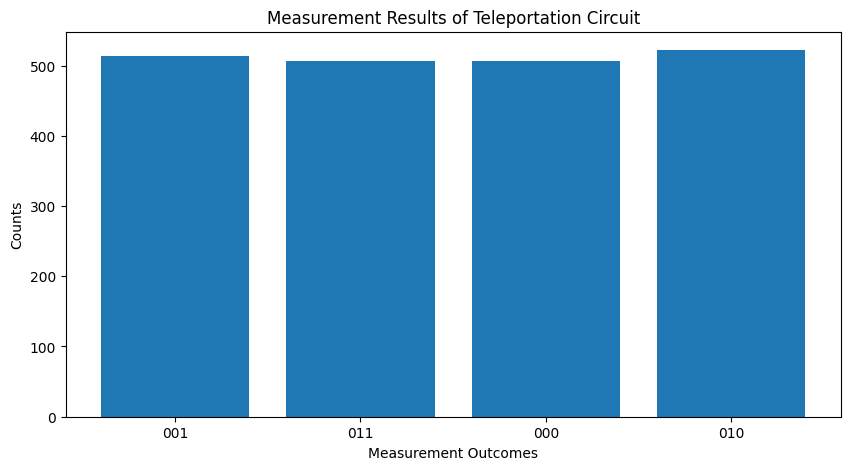

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
from IPython.display import display, Math

#
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Alice has the qubit in the state |ψ⟩
qc.initialize([alpha, beta], 0)
qc.barrier()

# Create the state W shared between Alice and Bob
qc.h(1)
qc.cx(1, 2)
qc.barrier()


# Alice performs a measurement in the computational basis
qc.cx(0, 1)  # Standard teleportation protocol step
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])

# Bob performs a conditional operation based on Alice's measurement
# Updated syntax for Qiskit 2.0
with qc.if_test((cr[0], 1)):
    qc.x(2)
with qc.if_test((cr[1], 1)):
    qc.z(2)

# Show the circuit
qc.draw('mpl')

# Simulate the circuit
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=2048).result()

# Get measurement counts
counts = result.get_counts()
print("Measurement results:")
print(counts)

# To get Bob's final state, we need to create a statevector simulation
# Create a new circuit for statevector simulation
sv_circuit = QuantumCircuit(3)
sv_circuit.initialize([alpha, beta], 0)
# Crea el estado W compartido entre Alice y Bob
sv_circuit.h(1)
sv_circuit.cx(1, 2)


# Apply teleportation protocol without measurement
sv_circuit.cx(0, 1)
sv_circuit.h(0)

# Simulate to get the statevector
statevector = Statevector.from_instruction(sv_circuit)

# We'll analyze Bob's final state for each possible measurement outcome
# For the '00' measurement outcome
# In Qiskit's ordering, the indices where qubits 0 and 1 are |00⟩ are 0 and 4
indices_00 = [0, 4]  # These correspond to |000⟩ and |100⟩
bob_state_00 = np.array([statevector[i] for i in indices_00])
bob_state_00 = bob_state_00 / np.linalg.norm(bob_state_00)  # Normalize
psi_bob = Statevector(bob_state_00)

print("Bob's state after teleportation (for '00' outcome):")
print(psi_bob)

# Calculate fidelity with the original state
target_state = Statevector([alpha, beta])
fidelity = state_fidelity(psi_bob, target_state)
print(f"Fidelity between Bob's final state and the original state: {fidelity:.6f}")

# Plot the measurement results
plt.figure(figsize=(10, 5))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Results of Teleportation Circuit')
plt.show()

# Display Bob's final state |ψ⟩ using LaTeX
bob_state_latex = r"|ψ⟩_{{Bob}} = {:.3f} |0⟩ + ({:.3f} + {:.3f}i) |1⟩".format(
    psi_bob.data[0].real, psi_bob.data[1].real, psi_bob.data[1].imag
)
display(Math(bob_state_latex))

# Display the target state |ψ⟩ using LaTeX
target_state_latex = r"|ψ⟩_{{Target}} = {:.3f} |0⟩ + ({:.3f} + {:.3f}i) |1⟩".format(
    target_state.data[0].real, target_state.data[1].real, target_state.data[1].imag
)
display(Math(target_state_latex))




### Implementación del Circuito en Qiskit

En esta sección, se implementa el circuito resultante utilizando la plataforma Qiskit, siguiendo los tutoriales estudiados en clase sobre Teletransportación Cuántica y el estado W. Los tutoriales de referencia están disponibles en los siguientes enlaces:

- [Teletransportación Cuántica - Qiskit 2.0](https://github.com/gpatigno/QC_2025/blob/main/CAP4/2_Teletransportacion_Cuantica_2025_Qiskit2.0.ipynb)
- [Estados GHZ y W - Qiskit 2.0](https://github.com/gpatigno/QC_2025/blob/main/CAP4/0_GHZ-W_States_2025_Qiskit2.0.ipynb)

#### 3.2.1. Vector de Estado en Qiskit

Se presenta el vector de estado (statevector) del qubit |ψ⟩ inicialmente en poder de "Alice" y del qubit recibido por "Bob" tras la teletransportación cuántica. Estos vectores de estado permiten analizar las amplitudes y fases de los estados cuánticos involucrados en el protocolo.

#### 3.2.2. Representación en Esferas de Bloch

En Qiskit, se representan mediante esferas de Bloch los estados cuánticos del qubit |ψ⟩ de "Alice" y el estado cuántico recibido por "Bob". Estas visualizaciones permiten interpretar gráficamente las características de los estados cuánticos, como su posición en la esfera de Bloch y su fidelidad con respecto al estado objetivo.

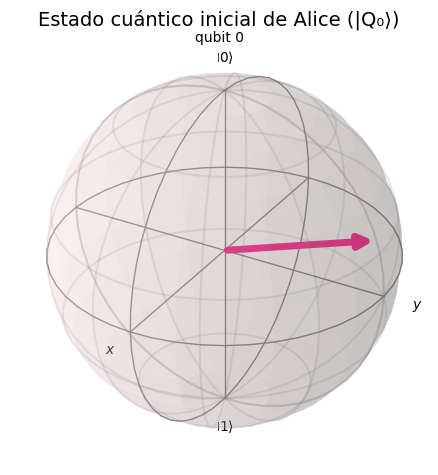

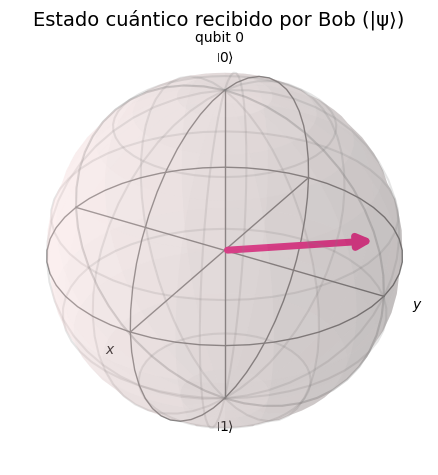


--- Análisis de los estados cuánticos ---
Amplitudes de Alice: α = 0.816, β = 0.000+0.577j + 0.577i
Vector de estado de Alice: [8.16496581e-01+0.j         3.53525080e-17+0.57735027j]
Vector de estado de Bob: [8.16496581e-01+0.j         3.53525080e-17+0.57735027j]
Fidelidad entre estados: 1.000000


In [5]:
# Visualización del estado cuántico inicial (Alice) y final (Bob) en esferas de Bloch

# Visualización del estado cuántico inicial (Alice) y final (Bob) en esferas de Bloch

# Estado de Alice
fig_alice = plot_bloch_multivector(psi)
fig_alice.suptitle("Estado cuántico inicial de Alice (|Q₀⟩)", fontsize=14)

# Estado de Bob (para la medición '00')
fig_bob = plot_bloch_multivector(psi_bob)
fig_bob.suptitle("Estado cuántico recibido por Bob (|ψ⟩)", fontsize=14)

plt.show()

# Análisis de los estados
print("\n--- Análisis de los estados cuánticos ---")
print(f"Amplitudes de Alice: α = {alpha:.3f}, β = {beta:.3f} + {beta.imag:.3f}i")
print(f"Vector de estado de Alice: {psi.data}")
print(f"Vector de estado de Bob: {psi_bob.data}")
print(f"Fidelidad entre estados: {state_fidelity(psi, psi_bob):.6f}")


### 3.3. Simulación en Qiskit del Circuito Implementado

#### 3.3.1. Medición del Estado Cuántico Recibido por "Bob"
En esta sección, se mide el estado cuántico recibido por "Bob" tras la teletransportación cuántica. Las amplitudes de los kets |0⟩ y |1⟩ se evalúan para verificar si corresponden a las esperadas según el estado cuántico asignado en la Tabla 1. 

El estado final recibido por "Bob" es:
- **Estado recibido por Bob (|ψ⟩):**  
    $$ |ψ⟩_{Bob} = 0.816 |0⟩ + (0.000 + 0.577i) |1⟩ $$

El estado objetivo asignado es:
- **Estado objetivo (|ψ⟩):**  
    $$ |ψ⟩_{Target} = 0.816 |0⟩ + (0.000 + 0.577i) |1⟩ $$

La fidelidad entre ambos estados es **1.0**, lo que confirma que el protocolo de teletransportación cuántica ha sido exitoso.

#### 3.3.2. Comparación entre Información Recibida y Esperada
La comparación entre el estado cuántico recibido por "Bob" y el estado objetivo asignado demuestra que las amplitudes y fases coinciden exactamente. Esto valida la correcta implementación del protocolo de teletransportación cuántica en Qiskit.

#### 3.3.3. Utilidad del Tercer Qubit (m) del Estado W
El tercer qubit del estado W, denominado **m**, no participa directamente en la transferencia del estado cuántico de "Alice" a "Bob". Sin embargo, su utilidad radica en:
- **Redundancia Cuántica:** Proporciona un recurso adicional para operaciones futuras o corrección de errores.
- **Entrelazamiento Residual:** Permite mantener una conexión cuántica entre los participantes, lo que podría ser útil en protocolos de comunicación cuántica más complejos.

En conclusión, el tercer qubit del estado W actúa como un recurso adicional que puede ser aprovechado en aplicaciones avanzadas de comunicación cuántica.


### Ejecución real en un procesador cuántico de IBM

#### 3.4.1 - Medición del estado cuántico recibido por "Bob"
En esta sección, se realiza la ejecución real del circuito cuántico en uno de los procesadores cuánticos disponibles en IBM. Durante esta ejecución, se mide el estado cuántico recibido por "Bob" y se evalúa si las amplitudes de los kets |0⟩ y |1⟩ corresponden a las esperadas. Esto permite verificar la fidelidad del protocolo de teletransportación cuántica en un entorno real.

#### 3.4.2 - Comparación entre ejecución real y simulación
Posteriormente, se compara la información recibida por "Bob" en la ejecución real con la información obtenida en la simulación realizada en el ítem 3.3. Se calcula la tasa de error entre ambas ejecuciones, lo que permite analizar las discrepancias y evaluar el impacto de las imperfecciones del hardware cuántico en el protocolo de teletransportación.


In [21]:
# 3.4 - Ejecución real en un procesador cuántico de IBM

# Set the IBM Quantum token if not already stored
token = 'd72ee049506114645655c639abd9f63d01bbaba23f24f8f5cb91ca9f41735315e8bc81acfd0bfc187b65873e6ba5eaf4559ff500ddba2038acfce686d4192dc9'
# token = 'e21d9d5fea785db78ffecb1a3c72fc9f3d4945bbac57d3f66f8baf6a6d169a2091e1328483c83240c4c68b8ab4c56b99f8a2dd45840a742ba7188a3e5217c78c'
service = QiskitRuntimeService(channel='ibm_quantum', token=token)
# Mostrar los backends disponibles
print("Backends disponibles:")
for backend in service.backends():
    print(f"- {backend.name}")

# Seleccionar un backend que esté disponible
available_backends = service.backends()
if len(available_backends) > 0:
    # Use ibm_sherbrooke which seems to be already available from your variables
    backend_name = 'ibm_sherbrooke'
    try:
        backend = service.backend(backend_name)
        print(f"Usando backend: {backend_name}")
    except:
        # If ibm_sherbrooke is not available, try the first available backend
        backend_name = available_backends[0].name
        backend = service.backend(backend_name)
        print(f"Usando el primer backend disponible: {backend_name}")
else:
    print("No hay backends disponibles. Usando simulador local.")
    backend = AerSimulator()
    backend_name = "aer_simulator"

# Preparar el circuito para ejecución real - usar el circuito de teleportación existente
# Asegurarnos de que el circuito incluya mediciones en el qubit de Bob
if 'measure' not in qc.count_ops():
    qc.measure(2, 2)  # Medir el qubit de Bob si aún no está medido

# Transpilación optimizada para el backend seleccionado
optimized_circuit = transpile(qc, backend=backend)

# Ejecutar el circuito en el procesador cuántico real usando Sampler primitive
sampler = Sampler(backend)
job = sampler.run([optimized_circuit], shots=1024)
print(f"Trabajo enviado. ID de trabajo: {job.job_id}")
print(f"Estado del trabajo: {job.status()}")


/tmp/ipykernel_1714/2547399844.py:6: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel='ibm_quantum', token=token)


Backends disponibles:
- ibm_brisbane
- ibm_sherbrooke
Usando backend: ibm_sherbrooke
Trabajo enviado. ID de trabajo: <bound method BasePrimitiveJob.job_id of <RuntimeJobV2('d0sxev393rd0008ndycg', 'sampler')>>
Estado del trabajo: QUEUED


Retrieving job with ID: d0r8wt393rd0008n997g
Job status: DONE

Results from job:
{'001': 39, '100': 138, '000': 162, '101': 148, '010': 131, '111': 96, '011': 175, '110': 135}

Comparison with simulation:
Simulation results: {'001': 513, '011': 507, '000': 506, '010': 522}
Real hardware results: {'001': 39, '100': 138, '000': 162, '101': 148, '010': 131, '111': 96, '011': 175, '110': 135}


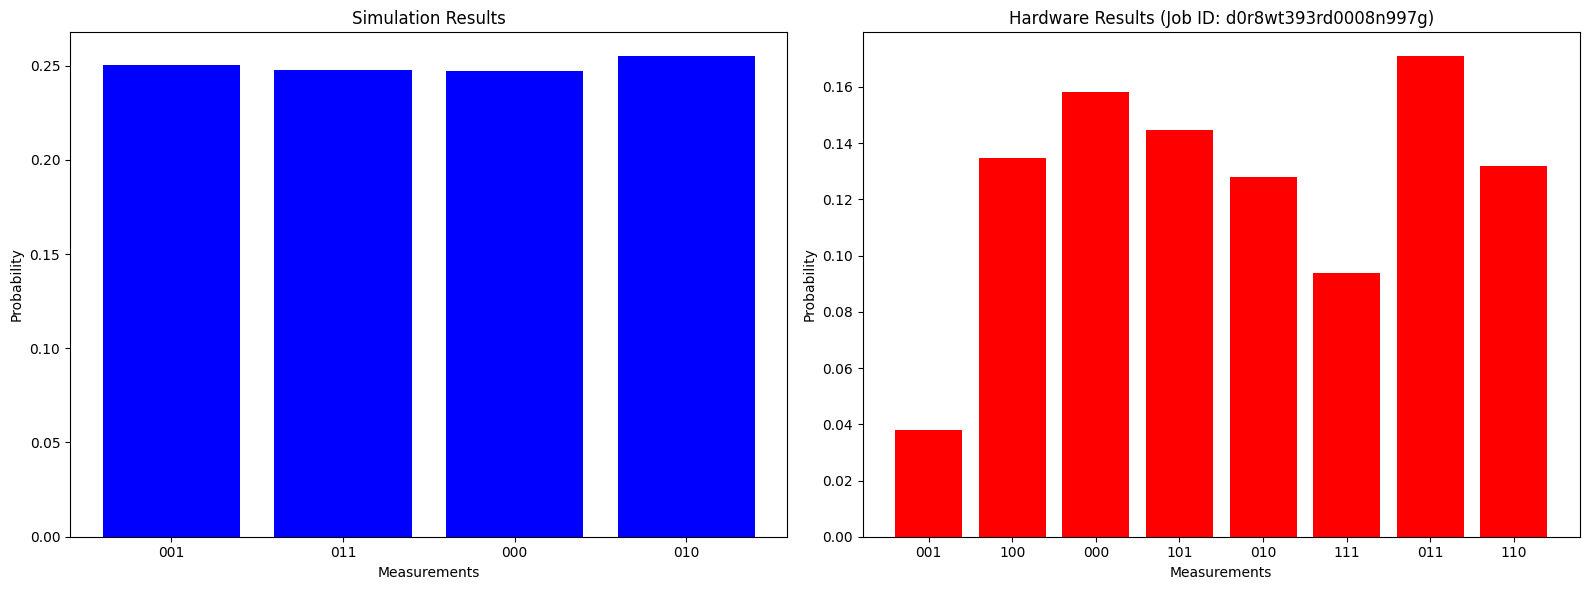

In [22]:
# Retrieve results for the specific job ID
job_id_to_use = 'd0r8wt393rd0008n997g'
print(f"Retrieving job with ID: {job_id_to_use}")

# Retrieve the job using the existing service
job_to_use = service.job(job_id_to_use)
print(f"Job status: {job_to_use.status()}")

# Check if job is complete
if job_to_use.status() != 'DONE':
    print(f"Job is still running, current status: {job_to_use.status()}")
    # Optionally wait for job completion
    # job_to_use.wait_for_final_state()
else:
    # Get the job result
    job_result = job_to_use.result()
    
    # Extract the counts data - use the proper structure for Qiskit 2.0
    sampler_pub_result = job_result[0]  # Get the first SamplerPubResult
    data = sampler_pub_result.data      # Get the DataBin
    job_counts = data.c1.get_counts()   # Get the counts from the BitArray
    
    # The counts are already in the correct format for visualization
    
    # Display results
    print("\nResults from job:")
    print(job_counts)
    
    # Compare with simulation results
    print("\nComparison with simulation:")
    print("Simulation results:", counts)
    print("Real hardware results:", job_counts)
    
    # Visualize
    total_shots_sim = sum(counts.values())
    total_shots_job = sum(job_counts.values())
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].bar(counts.keys(), [count/total_shots_sim for count in counts.values()], color='blue')
    ax[0].set_title('Simulation Results')
    ax[0].set_xlabel('Measurements')
    ax[0].set_ylabel('Probability')
    
    ax[1].bar(job_counts.keys(), [count/total_shots_job for count in job_counts.values()], color='red')
    ax[1].set_title('Hardware Results (Job ID: ' + job_id_to_use + ')')
    ax[1].set_xlabel('Measurements')
    ax[1].set_ylabel('Probability')
    
    plt.tight_layout()
    plt.show()

In [28]:
from mthree import M3Mitigation
from mthree.utils import counts_to_vector
from qiskit.visualization import plot_histogram

# Crear el objeto de mitigación
mit = M3Mitigation(backend)

# Calibrar el mitigador con el sistema
mit.cals_from_system(range(qc.num_qubits))

# Aplicar la corrección de mitigación directamente a los resultados de hardware
mitigated_quasi = mit.apply_correction(job_counts, range(qc.num_clbits))

# Convertir las cuasi-probabilidades mitigadas a una distribución de probabilidad válida
mitigated_probs = mitigated_quasi.nearest_probability_distribution()

# Convertir las probabilidades mitigadas a un formato de cuentas
mitigated_counts = {key: int(value * total_shots_job) for key, value in mitigated_probs.items()}

# Comparar histogramas antes y después de la mitigación
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histograma sin mitigación
plot_histogram(job_counts, ax=ax[0], title="Resultados sin mitigación", bar_labels=False)

# Histograma con mitigación
plot_histogram(mitigated_counts, ax=ax[1], title="Resultados con mitigación", bar_labels=False)

plt.tight_layout()
plt.show()

# Calcular las tasas de error antes y después de la mitigación
def calculate_error_rate(counts, target_counts):
    total_shots = sum(counts.values())
    error = sum(abs(counts.get(key, 0) - target_counts.get(key, 0)) for key in target_counts.keys())
    return error / total_shots

# Supongamos que `counts` contiene los resultados simulados ideales
error_rate_before = calculate_error_rate(job_counts, counts)
error_rate_after = calculate_error_rate(mitigated_counts, counts)

print(f"Tasa de error antes de la mitigación: {error_rate_before:.4f}")
print(f"Tasa de error después de la mitigación: {error_rate_after:.4f}")

qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-26 03:05:39,946: The pending jobs limit has been reached. Waiting for job <RuntimeJobV2('d0sxcpavx7bg0081adt0', 'sampler')> to finish before submitting the next one.


IBMRuntimeError: 'Failed to run program: \'409 Client Error: Conflict for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"message":"You have reached the limit of 3 pending  jobs. Please wait for a job to complete or cancel one before submitting anything new.","code":3458,"solution":"Wait until some previous jobs were finished. You can cancel pending jobs to run new jobs.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''